In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=3, n_features=3) #y as labels.


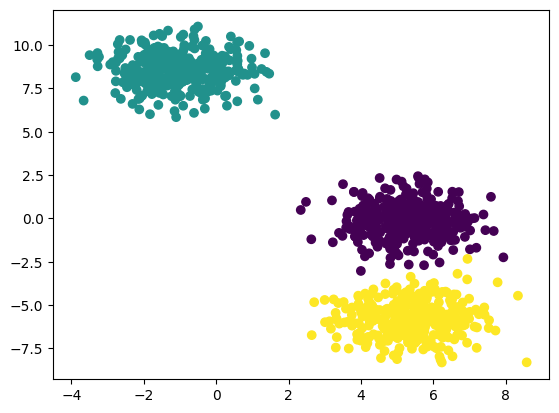

In [7]:
plt.scatter(X[:,0],X[:,1], c=y)

In [11]:
## standarization
from sklearn.preprocessing import StandardScaler
scalar  =StandardScaler()


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [13]:
X_train_scaled = scalar.fit_transform(X_train) 
X_test_scaled = scalar.transform(X_test)

In [16]:
from sklearn.cluster import KMeans


In [17]:
# elbow method to select k values
wcss = []
for k in range(1, 11):
    kmean = KMeans(n_clusters=k, init="k-means++")
    kmean.fit(X_train_scaled)
    wcss.append(kmean.inertia_)
wcss

[2010.0000000000002,
 861.6729268745106,
 118.68736450113884,
 103.96373470224736,
 99.72929896849956,
 82.19449855948625,
 69.30841652456247,
 63.546621139769925,
 59.40085320010529,
 57.874818024822076]

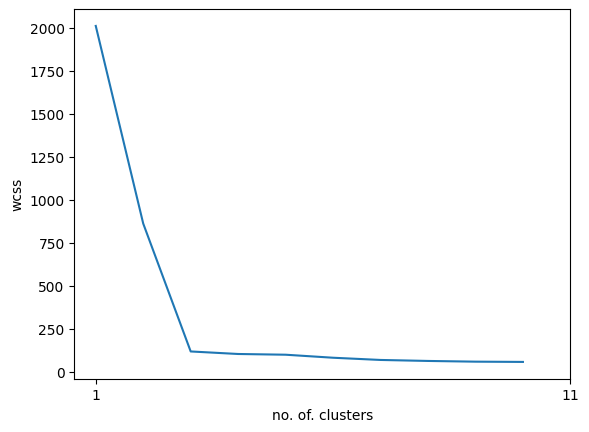

In [18]:
# plot elbow curve to select perfect wcss
plt.plot(range(1, 11), wcss)
plt.xticks((1, 11))
plt.xlabel('no. of. clusters')
plt.ylabel('wcss')
plt.show()

In [19]:
kmean = KMeans(n_clusters=3, init="k-means++")
kmean.fit_predict(X_train_scaled)

array([0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 1,
       0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2,
       2, 0, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2,
       2, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 2, 0, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0,
       2, 2, 1, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2,
       0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0,

In [21]:
y_pred = kmean.predict(X_test_scaled)
y_pred

array([2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 0, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1,
       2, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 0, 1, 0, 2,
       1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2,
       0, 1, 1, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 0,
       0, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 0,
       0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 1,
       2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 1,
       2, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1,
       1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 2,

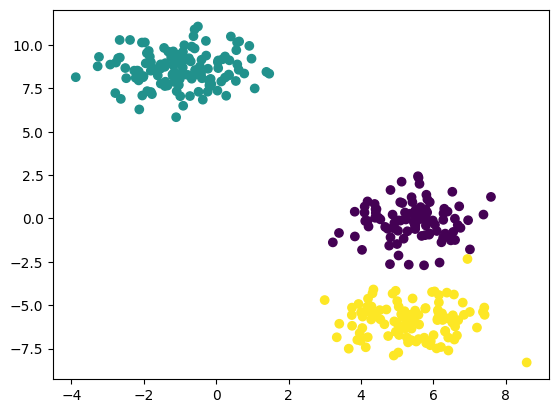

In [22]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_pred)

In [ ]:
# validate k value

from kneed import KneeLocator
kl  =KneeLocator(range(1, 11), wcss,curve='convex', direction='decreasing')
kl.elbow

np.int64(3)

In [25]:
# validate k value silhoutte score
from sklearn.metrics import silhouette_score

silhoute_coeff = []
for k in range(2, 11):
    kmean = KMeans(n_clusters=k, init="k-means++")
    kmean.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmean.labels_)
    silhoute_coeff.append(score)
silhoute_coeff

[np.float64(0.5906239963049601),
 np.float64(0.7894418106194607),
 np.float64(0.6280847288492726),
 np.float64(0.4856706790724451),
 np.float64(0.4749138755105585),
 np.float64(0.29339286872479947),
 np.float64(0.29082489887953183),
 np.float64(0.28724891953614434),
 np.float64(0.2680707716824038)]

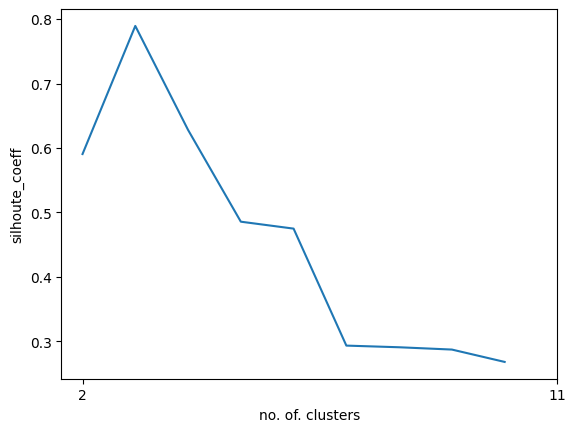

In [26]:
# plot elbow curve to select perfect wcss
plt.plot(range(2, 11), silhoute_coeff)
plt.xticks((2, 11))
plt.xlabel('no. of. clusters')
plt.ylabel('silhoute_coeff')
plt.show()